# Individual Python Assignment
## - By Priya Shaw[EA20041]

## Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/Users/Priya/XLRI/Python/Indv assignment/default.csv")

In [3]:
df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,1.0,unskilled,14.0,86,3.0,No,poor,1,personal,2
1,Female,1.0,skilled,15.0,94,3.0,No,poor,1,personal,3
2,Male,1.0,unskilled,16.0,86,3.0,No,poor,1,personal,2
3,Female,1.0,skilled,13.0,94,3.0,No,poor,1,personal,3
4,Male,1.0,skilled,12.0,85,3.3,No,poor,1,personal,2


## Cleaning data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         781 non-null    object 
 1   LoanOffered    779 non-null    float64
 2   Job            781 non-null    object 
 3   WorkExp        779 non-null    float64
 4   CreditScore    781 non-null    int64  
 5   EMIRatio       781 non-null    float64
 6   Status         781 non-null    object 
 7   CreditHistory  781 non-null    object 
 8   Ownhouse       781 non-null    int64  
 9   Purpose        781 non-null    object 
 10  Dependents     781 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 67.2+ KB


In [5]:
# checking null values in data
df.isnull().sum()

Gender           0
LoanOffered      2
Job              0
WorkExp          2
CreditScore      0
EMIRatio         0
Status           0
CreditHistory    0
Ownhouse         0
Purpose          0
Dependents       0
dtype: int64

In [6]:
#replacing null values with 0
df.fillna(value=0, inplace=True)

In [7]:
df.isnull().sum()

Gender           0
LoanOffered      0
Job              0
WorkExp          0
CreditScore      0
EMIRatio         0
Status           0
CreditHistory    0
Ownhouse         0
Purpose          0
Dependents       0
dtype: int64

In [8]:
# Taking into account only those individuals who got loan
df=df[df['LoanOffered']==1]

In [38]:
df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,1.0,unskilled,14.0,86,3.0,No,poor,1,personal,2
1,Female,1.0,skilled,15.0,94,3.0,No,poor,1,personal,3
2,Male,1.0,unskilled,16.0,86,3.0,No,poor,1,personal,2
3,Female,1.0,skilled,13.0,94,3.0,No,poor,1,personal,3
4,Male,1.0,skilled,12.0,85,3.3,No,poor,1,personal,2


## Data Analysis

### Data Analysis on Status Vs Purpose

In [9]:
# Calculating no. of loan recipients for each purpose
df.groupby('Purpose').count()['Status']

Purpose
car                260
consumerdurable    279
education          125
personal           115
Name: Status, dtype: int64

In [10]:
# Calculating no. of defaulters for each purpose
df_Status= df[df['Status']=='Default'].groupby('Purpose').count()
df_Status['Status']

Purpose
car                42
consumerdurable    43
education          18
personal           21
Name: Status, dtype: int64

Text(0.5, 1.0, '% of Defaulters for each Purpose')

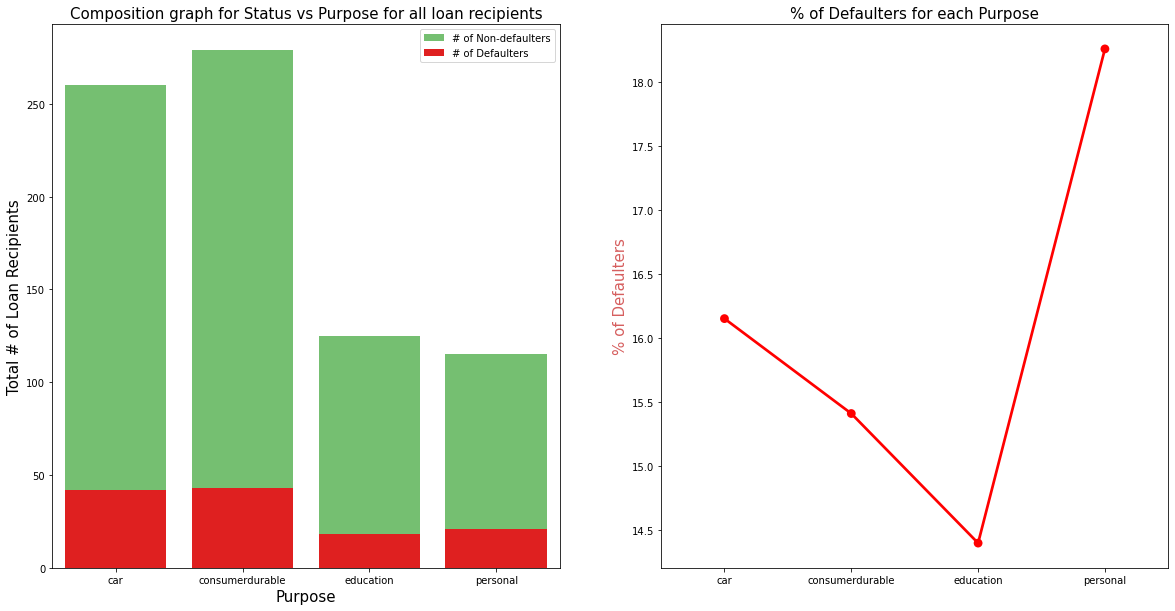

In [11]:
# Plotting graphs

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,10))

purpose = [purpose for purpose, df in df.groupby(['Purpose'])]

sns.set_color_codes("muted")
sns.barplot(purpose,df.groupby('Purpose').count()['Status'], color='g',label="# of Non-defaulters",ax=ax1)
sns.barplot(purpose,df_Status['Status'], color='red', ci=False,label="# of Defaulters",ax=ax1)


ax1.set_xlabel('Purpose',size=15)
ax1.set_ylabel('Total # of Loan Recipients',size=15)
ax1.legend(loc="upper right", frameon=True)

sns.pointplot(purpose,(df_Status['Status']/df.groupby('Purpose').count()['Status'])*100, color='red', 
              ci=False,ax=ax2)
plt.ylabel("% of Defaulters", size=15, color='r')

ax1.set_title("Composition graph for Status vs Purpose for all loan recipients", fontsize=15)
ax2.set_title( "% of Defaulters for each Purpose", fontsize=15)

# The no. of individuals availing loan(279) and no. of defaulters(43) is maximum for consumerdurable loans.
# But the overall percentage of defaulters is minimum in education loan and is maximum in personal loan. 


### Data Analysis on Status Vs EMIRatio

Text(0.5, 1.0, 'EMIRatio v/s Purpose')

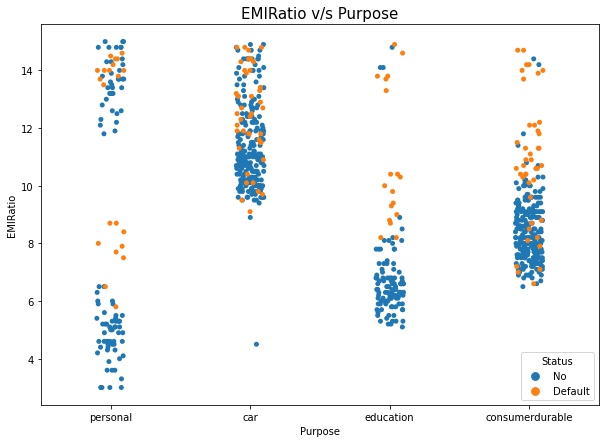

In [27]:

plt.figure(figsize=(10,7))

sns.stripplot( df['Purpose'],df['EMIRatio'], hue=df['Status'])
plt.title("EMIRatio v/s Purpose", size=15)

#1.Most defaulters lie higher range from 8-15.
#2.EMIRatio for almost all car loans is high(>9). So we need to find other factors causing the defaults in this case
#3.If we keep the EMIRatio below 8 in education loan, we might see a substantial decrease in no. of defaulters.
#In case of education loan, it might reduce to none
#4.In case of personal and consumerdurable loans, the EMIRatio for defaulters is spread across a wider range,
#so we must find other factors causing defaults in range EMIRatio < 8




### Data Analysis on Status Vs Credit History/Credit Score

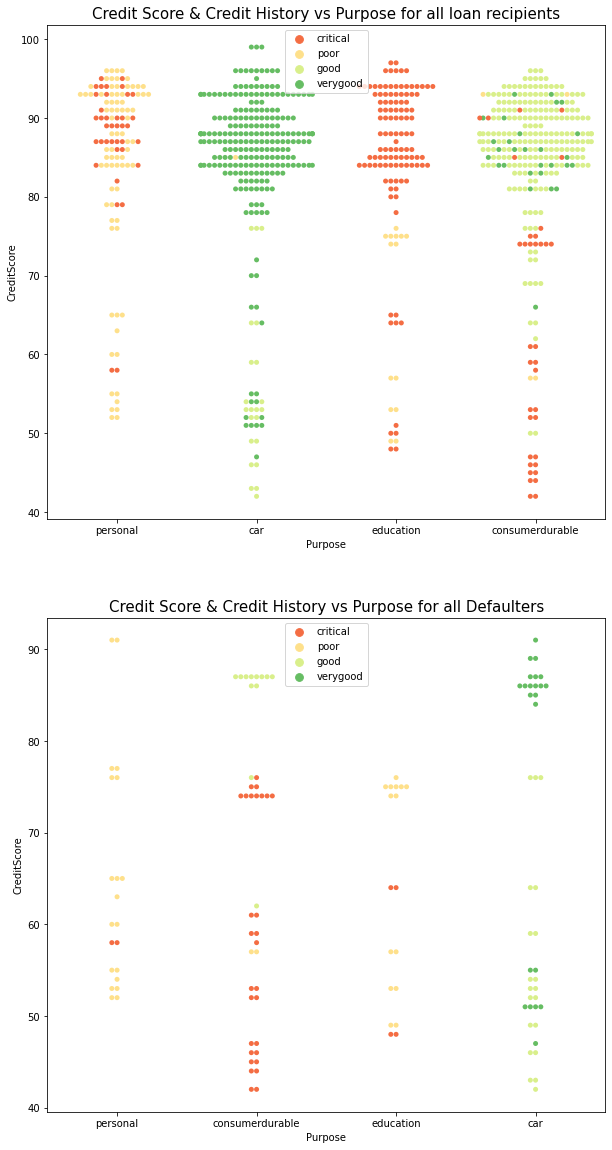

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(10,20))


df_Default=df[(df['Status']=='Default')]
df_Default

sns.swarmplot('Purpose','CreditScore', hue='CreditHistory', 
              data=df,palette="RdYlGn",hue_order=['critical','poor','good','verygood'],ax=ax1)
sns.swarmplot('Purpose','CreditScore', hue='CreditHistory', 
              data=df_Default,palette="RdYlGn",hue_order=['critical','poor','good','verygood'],ax=ax2)
plt.legend(loc="upper center")

ax1.set_title("Credit Score & Credit History vs Purpose for all loan recipients", fontsize=15)
ax2.set_title( "Credit Score & Credit History vs Purpose for all Defaulters", fontsize=15)
ax1.legend(loc="upper center")

#1. Most of the loan recipients have high Credit Score
#2. All personal and education loan recipients including both defaulters and non-defaulters have poor or critical 
#Credit history irresspective of credit score/EMIRatio. Therefore no strong conclusion can be drawn on 
#effect of it on defaulters.
#3.All car loan defaulters have good or very good Credit history
#4. Since defaulters for each loan purpose varies across entire range of Credit Score, 
#no strong conclusion can be draw based on Credit Score


### Data Analysis on Status Vs OwnHouse

In [37]:
#Calculating total no. of Defaulters
df_Default.count()[1]

123

In [14]:
#Calculating no. of defaulters who do not own house
df_Default[df_Default['Ownhouse']==0].count()[1]

123

In [16]:
#Calculating no. of loan recipients who do not own house
df[df['Ownhouse']==0].count()[1]

180

Text(0.5, 1.0, 'Defaulters in each purpose Vs Ownhouse')

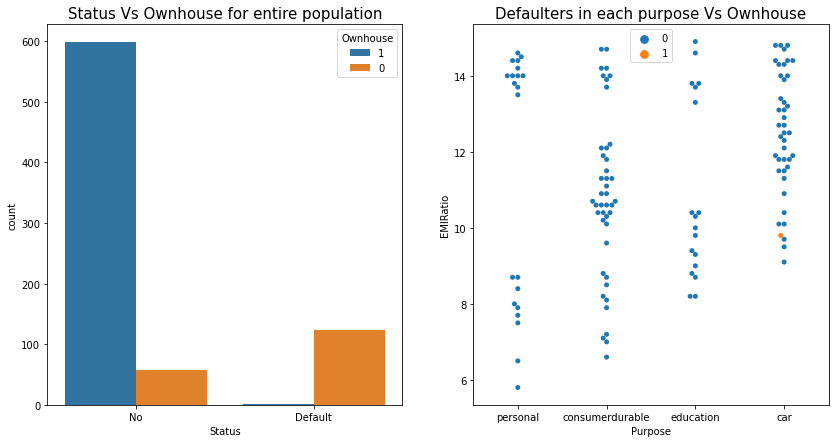

In [43]:
# Plotting graphs

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(14,7))

sns.countplot('Status',data=df,ax=ax1,hue='Ownhouse',hue_order=[1,0],)
sns.swarmplot('Purpose','EMIRatio', hue='Ownhouse', 
              data=df_Default, ax=ax2)
plt.legend(loc="upper center")
ax1.set_title("Status Vs Ownhouse for entire population", fontsize=15)
ax2.set_title( "Defaulters in each purpose Vs Ownhouse", fontsize=15)

#All the defaulters except one do not own house
#It is recommended not to offer loan to individuals who do not own house


### Data Analysis on Status Vs Work Experience

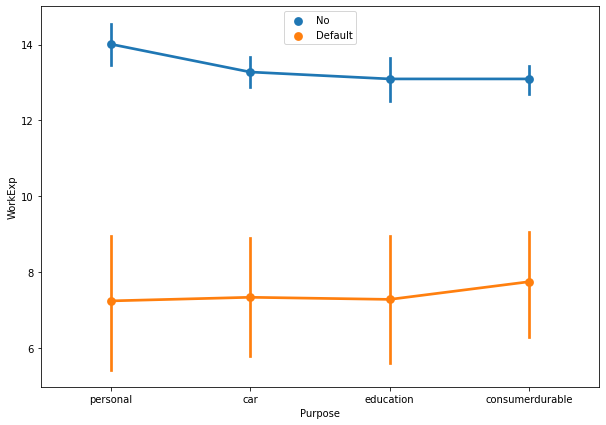

In [18]:
plt.figure(figsize=(10,7))

sns.pointplot('Purpose','WorkExp', hue='Status', 
              data=df)
plt.legend(loc="upper center")

#Most of the defaulters have low work experience within the range of 5-9 years.
#It is recommended to give less preference to individuals having less Work Experience(i,e.,<9 years)